# Starting with OpenCV

### Reading, writing and displaying images with OpenCV

In [5]:
#loading the essential libraries,opencv and numpy respectively

import cv2
import numpy as np

In [26]:
# load an image using imread specifying the path to the image

input_img = cv2.imread('./images/input.jpg')

# to display this image stored in the variable input_img, we use imshow
# the first parameter would be the title as shown on image window
# the second paramenter would be the image variable

cv2.imshow('Louvre', input)

# 'waitKey' allows us to input information when an image window is open
# by leaving it blank, it just waits for anykey to be pressed before
# continuing. By placing numbers (except 0), we can specify a delay
# for how long you keep the window open(time in milliseconds here)

#cv2.waitKey(2000)

cv2.waitKey()


# this command closes all open windows
cv2.destroyAllWindows()

In [7]:
# let's see how images are stored

print(input_img.shape)

(415, 622, 3)


### Shape gives the dimensions of the image array

The 2D dimensions are 415 by 622 pixels in height and width respectively. The 3 as the last parameter signifies that there are three components, RGB, that make up this image

### How do we save images we edit in OpenCV?

In [8]:
# We simply use the 'imwrite' function specifying the file name and the
# image to be saved

cv2.imwrite('output.jpg', input_img)
cv2.imwrite('output.png', input_img)

True

## Grayscaling
### The process of converting a full color image to shades of gray

In OpenCV, many functions compulsorily require images to be in grayscale before processing. This is done to simplify the image, acting almost as noise reduction and increasing processing time as there is less information in the image.

### Let's convert the color image to GrayScale

In [10]:
import cv2

input_img = cv2.imread('./images/input.jpg')
cv2.imshow('Original RGB', input_img)
cv2.waitKey()

# We use cvtColor to convert to grayscale

gray_img = cv2.cvtColor(input_img, cv2.COLOR_BGR2GRAY)

cv2.imshow('Grayscale', gray_img)
cv2.waitKey()
cv2.destroyAllWindows()

In [11]:
# Another method, faster

img = cv2.imread('./images/input.jpg', 0)
cv2.imshow('grayscaled', img)
cv2.waitKey()
cv2.destroyAllWindows()

## Color Spaces

### OpenCV's RGB is BGR
 
Let's look at the shape of the original image array again

In [13]:
print(input_img.shape)

(415, 622, 3)


In [18]:
# Let's find the BGR Values for a particular location in the image
# i.e., a single pixel

print(input_img[5,25])
B, G, R = input_img[5,25]
print(B, G, R)

[13 18 33]
13 18 33


Let's see what happens when we check the grayscaled image

In [19]:
print(img.shape)

(415, 622)


In [20]:
print(img[5,25])

22


It's now only 2 dimensions. Each pixel coordinate has only one value, with a range of 0 to 255

## The HSV Color Space

### HSV is very useful in color filtering

In [22]:
input_img = cv2.imread('./images/input.jpg')
hsv_img = cv2.cvtColor(input_img, cv2.COLOR_BGR2HSV)

cv2.imshow('HSV Image', hsv_img)
cv2.imshow('Hue Channel', hsv_img[:,:,0])
cv2.imshow('Saturation Channel', hsv_img[:,:,1])
cv2.imshow('Value/Brightness Channel', hsv_img[:,:,2])

cv2.waitKey()
cv2.destroyAllWindows()

In [27]:
## Let's now explore individual channels in an RGB Image

image= cv2.imread('./images/input.jpg')
B, G, R = cv2.split(image)
print('This is B image\'s shape', B.shape)

cv2.imshow('Red', R)
cv2.imshow('Blue', B)
cv2.imshow('Green', G)

cv2.waitKey()
cv2.destroyAllWindows()

# let's remake the original image,

merged = cv2.merge([B, G, R])
cv2.imshow('Remade image', merged)

merged = cv2.merge([B+100, G, R])
cv2.imshow('Remade image with amplified BLUE', merged)
cv2.waitKey()
cv2.destroyAllWindows()

This is B image's shape (415, 622)


## Histograms are a great way to visualize individual color components

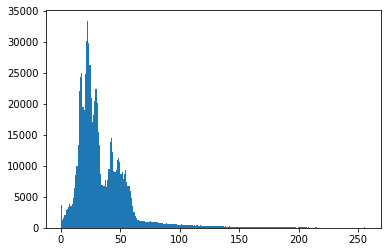

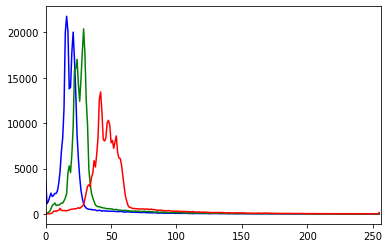

In [30]:
import cv2
import numpy as np

# We need to import matplotlib to create our histogram plots
from matplotlib import pyplot as plt

image = cv2.imread('images/input.jpg')

histogram = cv2.calcHist([image], [0], None, [256], [0, 256])

# We plot a histogram, ravel() flatens our image array 
plt.hist(image.ravel(), 256, [0, 256]); plt.show()

# Viewing Separate Color Channels
color = ('b', 'g', 'r')

# We now separate the colors and plot each in the Histogram
for i, col in enumerate(color):
    histogram2 = cv2.calcHist([image], [i], None, [256], [0, 256])
    plt.plot(histogram2, color = col)
    plt.xlim([0,256])
    
plt.show()

**cv2.calcHist(images, channels, mask, histSize, ranges[, hist[, accumulate]])**

- **images**: it is the source image of type uint8 or float32. it should be given in square brackets, ie, "[img]".
- **channels**: it is also given in square brackets. It is the index of channel for which we calculate histogram. For example, if input is grayscale image, its value is [0]. For color image, you can pass [0], [1] or [2] to calculate histogram of blue, green or red channel respectively.
- **mask**: mask image. To find histogram of full image, it is given as "None". But if you want to find histogram of particular region of image, you have to create a mask image for that and give it as mask. (I will show an example later.)
- **histSize**: this represents our BIN count. Need to be given in square brackets. For full scale, we pass [256].
- **ranges** : this is our RANGE. Normally, it is [0,256].

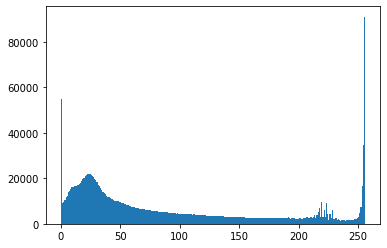

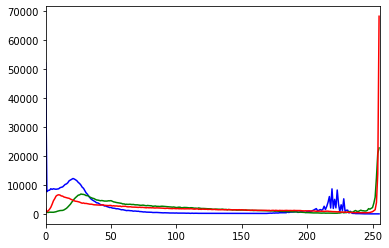

In [31]:
import cv2
import numpy as np

# We need to import matplotlib to create our histogram plots
from matplotlib import pyplot as plt

image = cv2.imread('images/tobago.jpg')

histogram = cv2.calcHist([image], [0], None, [256], [0, 256])

# We plot a histogram, ravel() flatens our image array 
plt.hist(image.ravel(), 256, [0, 256]); plt.show()

# Viewing Separate Color Channels
color = ('b', 'g', 'r')

# We now separate the colors and plot each in the Histogram
for i, col in enumerate(color):
    histogram2 = cv2.calcHist([image], [i], None, [256], [0, 256])
    plt.plot(histogram2, color = col)
    plt.xlim([0,256])
    
plt.show()

In [32]:
image = cv2.imread('images/tobago.jpg')
cv2.imshow("Tobago", image)

cv2.waitKey()
cv2.destroyAllWindows()

## Drawing images and shapes using OpenCV

Let's start out by making a black square

In [33]:
import cv2
import numpy as np

# Create a black image

image = np.zeros((512, 512, 3), np.uint8)

# Can we make this in black and white

image_bw = np.zeros((512, 512), np.uint8)

cv2.imshow('Black rectangle in color', image)
cv2.imshow('Black rectangle in B&W', image_bw)

cv2.waitKey()
cv2.destroyAllWindows()

### Let's draw a line over our black square

cv2.line(image, starting coordinates, ending coordinates, color, thickness)

In [34]:
# Draw a diagonal blue line of thickness 5 pixels

image = np.zeros((512, 512, 3), np.uint8)
cv2.line(image, (0,0), (511,511), (255,127,0), 5)
cv2.imshow('Blue line', image)

cv2.waitKey()
cv2.destroyAllWindows()

### Let's draw a rectangle

cv2.rectangle(image, starting vertex, opposite vertex, color, thickness)

In [36]:
# Draw a rectangle

image = np.zeros((512,512,3), np.uint8)
cv2.rectangle(image, (75,150), (450,450), (127,50,127), -1)
cv2.imshow('Rectangle', image)
cv2.waitKey()
cv2.destroyAllWindows()

### Let's draw a circle

cv2.circle(image, center, radius, color, fill)

In [37]:
# Drawing a circle

image = np.zeros((512, 512, 3), np.uint8)

cv2.circle(image, (150,150), 100, (15, 75, 50), -1)
cv2.imshow('Circle', image)
cv2.waitKey()
cv2.destroyAllWindows()

### How about polygons?

In [38]:
image = np.zeros((512,512,3), np.uint8)

# Let's define the 4 points

pts = np.array([[10,50], [400,50], [90,200], [50,500]])

# Let's now reshape our points in form required by polylines

pts = pts.reshape((-1, 1, 2))

cv2.polylines(image, [pts], True, (0, 255, 255), 3)
cv2.imshow('Polygon', image)

cv2.waitKey()
cv2.destroyAllWindows()

### Let's even add text with cv2.putText

cv2.putText(image, 'Text to Display', bottom left starting point, Font, Font Size, Color, Thickness)

- FONT_HERSHEY_SIMPLEX, FONT_HERSHEY_PLAIN
- FONT_HERSHEY_DUPLEX,FONT_HERSHEY_COMPLEX 
- FONT_HERSHEY_TRIPLEX, FONT_HERSHEY_COMPLEX_SMALL
- FONT_HERSHEY_SCRIPT_SIMPLEX
- FONT_HERSHEY_SCRIPT_COMPLEX

In [39]:
image = np.zeros((512,512,3), np.uint8)

cv2.putText(image, 'Hello World!', (75, 290), cv2.FONT_HERSHEY_COMPLEX, 2, (100,170,0), 3)
cv2.imshow('Hello World', image)

cv2.waitKey()
cv2.destroyAllWindows()

In [40]:
# END OF THE FIRST NOTEBOOK

**Authored by bosecodes**